In [48]:
#The goal is to predict class of incidents, there are 2 types of incidents. Where are are considering only two classes compared to 
#initial approach that uses 4 class. The classes used are:
#Y1= flash explosion
#Y2= sustained explosion
#We have 52 data points, 34 training, 9 testing, 10 validation 

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import random


import io
#Read all 52 data points
df0 = pd.read_csv("MyData.csv")
#Read training data
df = pd.read_csv("TrainingData.csv")
#Read test data
df1 = pd.read_csv("TestData.csv")
#Read validation data
df2 = pd.read_csv("ValidationData.csv")

#grouping x and y train data
x_train= df.iloc[:,:-1] #There are 3 features selected :operational state, phase of chemical(s) and number of chemical(s)
y_train=df.iloc[:,-1] #Accident type classification from last column

#print(x_train)
#print(y_train)

#grouping x and y test data
x_test= df1.iloc[:,:-1] #There are 3 features selected :operational state, phase of chemical(s) and number of chemical(s)
y_test=df1.iloc[:,-1] #Accident type classification from last column

#print(x_test)
#print(y_test)

#grouping x and y validation data
x_val= df2.iloc[:,:-1] #There are 3 features selected :operational state, phase of chemical(s) and number of chemical(s)
y_val=df2.iloc[:,-1] #Accident type classification from last column

#print(x_val)
#print(y_val)


In [49]:
#Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

#Creating object for ensemble named randomForestClassifier (rfc). It has 100 numbers of estimators (models or trees) since looking to have deterministic behavior
#Must also fit array (input,output) to random forest classifier

rfc= RandomForestClassifier(n_estimators=100,random_state=0).fit(x_train,y_train)

#Added random_state=0 and now output shows deterministic behavior.
#If the estimator’s random_state parameter is an integer (or if the estimator doesn’t have a random_state parameter), 
#an exact clone is returned: the clone and the original estimator will give the exact same results. Otherwise, statistical 
#clone is returned: the clone might yield different results from the original estimator. More details can be found in Controlling randomness.

y_pred= rfc.predict(x_test)
print('Incident Prediction:',y_pred)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

#Evaluating the random forest classifier
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred, zero_division=0))
#print('Confusion Matrix:',confusion_matrix(y_test,y_pred))

Incident Prediction: ['Y1' 'Y1' 'Y2' 'Y1' 'Y1' 'Y2' 'Y1' 'Y2' 'Y2']
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

          Y1       1.00      0.71      0.83         7
          Y2       0.50      1.00      0.67         2

    accuracy                           0.78         9
   macro avg       0.75      0.86      0.75         9
weighted avg       0.89      0.78      0.80         9



 1) Phase of Chemical(s)           0.873033
 2) Operational State              0.103989
 3) Number of Chemical(s)          0.022978


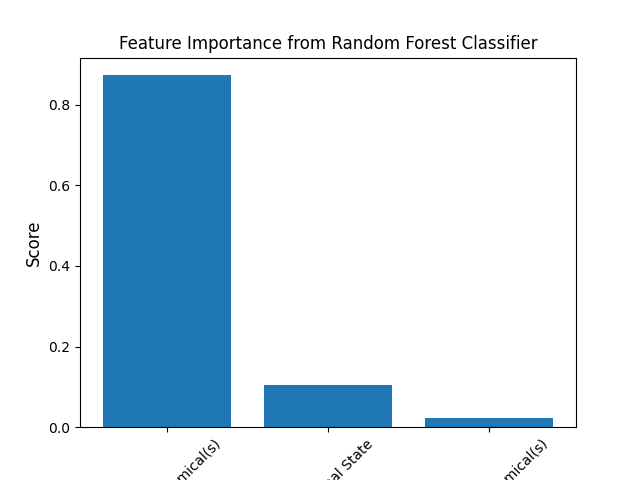

In [50]:
#Determine feature importance values
importances = rfc.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
feat_labels = df0.columns[1:]
 
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
    
plt.title('Feature Importance from Random Forest Classifier', size=12)
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=45)
plt.ylabel("Score",size=12)
plt.xlabel("Features",size=12)
#plt.tight_layout()
plt.show()

In [52]:
#Testing rfc with validation data
y_pred1= rfc.predict(x_val)
print('Incident Prediction:',y_pred1)

# Evaluating model accuracy and how often the classifier is correct?
print('Accuracy:',metrics.accuracy_score(y_val, y_pred1))

#Output classification report
print(classification_report(y_val,y_pred1, zero_division=0))

Incident Prediction: ['Y1' 'Y1' 'Y1' 'Y1' 'Y1' 'Y1' 'Y1' 'Y1' 'Y2' 'Y2']
Accuracy: 1.0
              precision    recall  f1-score   support

          Y1       1.00      1.00      1.00         8
          Y2       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



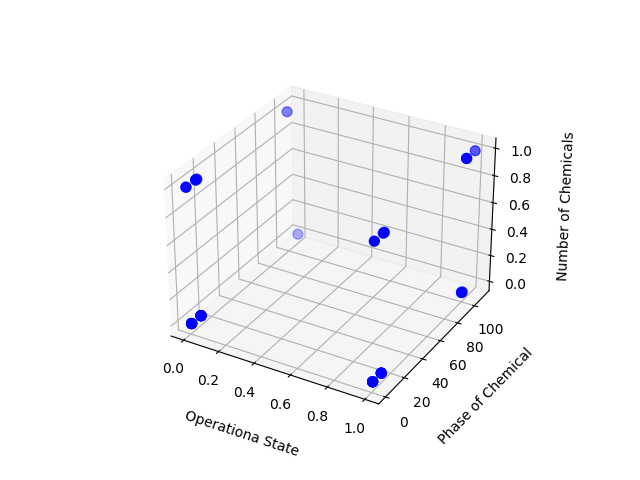

In [53]:
#Read all 66 data points
MyData = pd.read_csv('MyData.csv')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.grid()

#X-operational State
x=MyData.iloc[:,1] 
#print(x)

#Y-phase of chemical
y=MyData.iloc[:,2] 
#print(y)
#Y= random.choice((z, 0.75, 1.25))
#print(Y)

#Z-number of chemicals
z=MyData.iloc[:,3]
#Z= random.choice((z, 0.75, 1.25))
#print(Z)

# Data for three-dimensional scattered points
ax.scatter3D(x, y, z, c='b', s= 50)

# Set axes label
ax.set_xlabel('Operationa State', labelpad=12)
ax.set_ylabel('Phase of Chemical', labelpad=12)
ax.set_zlabel('Number of Chemicals', labelpad=12)

plt.show()